# 3) Accessing subsets of arrays

In [1]:
import numpy as np

## NumPy documentation

**Note: Numpy has a very good and extensive documentation, which you can find at https://numpy.org/doc/stable/. If you need any further details about numpy arrays, you can always refer to it.**

## Slicing arrays

Note that Numpy indexing (which includes slicing) is very powerful and that we can cover only a tiny fraction of this topic here. To learn more you can for example consult the [Numpy reference](https://numpy.org/devdocs/user/basics.indexing.html).

### One-dimensional arrays

Let's create a simple 1D array first:

In [2]:
my_array = np.random.normal(size=10)
my_array

array([ 1.59853759, -0.7667235 , -1.430379  , -0.14176639, -0.76980832,
        0.60494905,  0.12500904, -2.33737442, -0.24155802,  1.25035876])

Remember that when we want to access a single element, we use the index of that element in square brackets:

In [3]:
my_array[1]

np.float64(-0.7667234964246312)

Remember that **we start counting from 0** in Python, which is why with index 1 we access the *second* element.

For so-called "slicing", we extend the notation and extract a range of elements by using the ```from_index:to_index (excluded)``` notation. Here ```excluded``` means that the **last index** specified is **not included**. For example if we want to recover elements with indices from 1 to 3 we write:

In [4]:
my_array[1:4]

array([-0.7667235 , -1.430379  , -0.14176639])

We can also set values in the array in the same maner. For example let's set the above elements to 10:

In [5]:
my_array[1:4] = 10

In [6]:
my_array

array([ 1.59853759, 10.        , 10.        , 10.        , -0.76980832,
        0.60494905,  0.12500904, -2.33737442, -0.24155802,  1.25035876])

Note that you can use default values to simplify the notation. For example if you want to extract all elements from the 4th one **to the last one**, you don't have to specify the last index:

In [7]:
my_array[4:]

array([-0.76980832,  0.60494905,  0.12500904, -2.33737442, -0.24155802,
        1.25035876])

### Higher dimensions

We have seen before that we can create arrays with more than one dimension (think e.g. of the pixels of an image). For example:

In [8]:
array2D = np.random.normal(size=(3,5))
array2D

array([[ 0.38603926, -0.10810005,  0.21813696, -0.69648789, -0.80896879],
       [-0.83232921, -0.19439995,  0.7428365 ,  0.62601411,  0.53485688],
       [-0.06653892,  1.36892845, -0.40080062, -1.28299304, -1.53424845]])

The indexing system works in the same way here. We just have to specify now for each dimension which rows/columns we want to extract with ```my_array[start_row:end_row, start_column:end_column]```:

In [9]:
array2D[1:3, 0:2]

array([[-0.83232921, -0.19439995],
       [-0.06653892,  1.36892845]])

Here again, we can simplify the notation. If we want to select a few columns but **want to keep all rows**, we can leave away the start (defaults to 0) *and* the end (defaults to the max) and simply put ```:```, which means "all" for that dimension:

In [10]:
array2D[:, 1:3]  # Take all rows, but only columns 1 and 2

array([[-0.10810005,  0.21813696],
       [-0.19439995,  0.7428365 ],
       [ 1.36892845, -0.40080062]])

On the contrary, we can reduce the result to a single row by specifying an index (instead of a range) for the first dimension - combining simple indexing and slicing:

In [11]:
array2D[0, 1:3]

array([-0.10810005,  0.21813696])

Sidenote: With indexing, we remove the respective dimension, so the result is a 1D array. If we want to keep a 2D array, we can use a range encompassing the first dimension only:

In [12]:
array2D[0:1, 1:3]

array([[-0.10810005,  0.21813696]])

### Slicing with images

Let's apply the slicing notation to images, which, as we've seen, can be treated as 2D (or higher-dimensional) arrays.

First, let's load an image as a numpy array and display it:

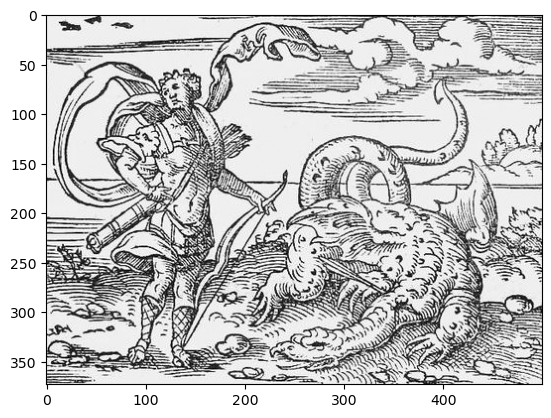

In [13]:
import skimage.io
from matplotlib import pyplot as plt

img_path = "https://upload.wikimedia.org/wikipedia/commons/thumb/6/6d/Apollo_dan_Pithon.jpg/500px-Apollo_dan_Pithon.jpg"
image_array = skimage.io.imread(img_path, as_gray=True)  # Use `as_gray=True` to convert it to grayscale (no channel dimension)

plt.imshow(image_array, cmap='gray')

Let's now extract and display the columns 300 to 500 of the image:

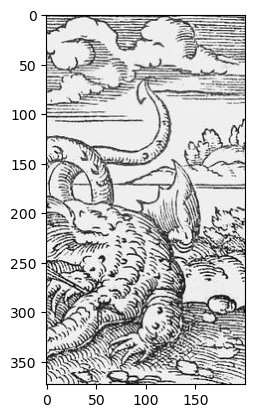

In [14]:
mid_cols = image_array[:, 300:500]  # Extract columns 300 to 500 (but keep all rows)
plt.imshow(mid_cols, cmap='gray')

We can also set values in the array in the same maner. For example, let us select the top 50 rows and set them to black (i.e. set all pixel values to 0):

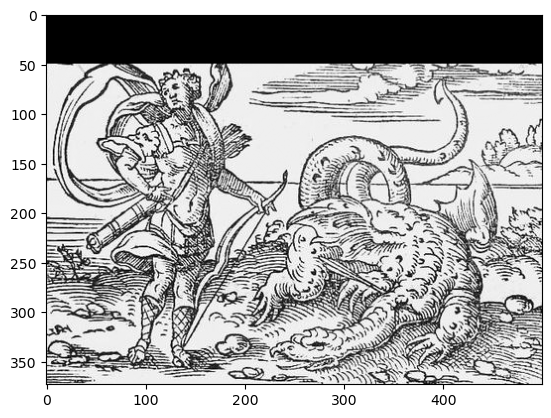

In [15]:
image_array[:50, :] = 0  # Set the top 50 rows to black
plt.imshow(image_array, cmap='gray')

Now, let's combine the two ideas to do the same on the bottom: Let's first save the bottom part of the image in a new variable and then set it to black:

In [16]:
bot50 = image_array[-50:, :] # Remember that negative indices count from the end
bot50[:] = 0  # Set all pixels of the slice to black
# NOTE: we need to use `[:]` because `bot50 = 0` would just overwrite the variable with the value 0

Let's check the original image:

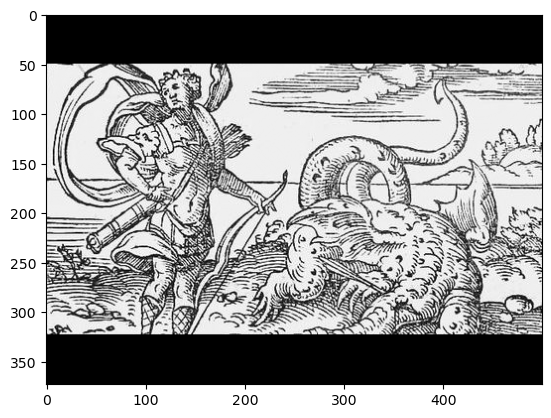

In [17]:
plt.imshow(image_array, cmap='gray')

As we can see, the bottom **pixels of the original image also changed** to black. This is because we did **not create an independent copy** of the bottom part, but just created a new variable that points to the same data in memory (a "view"). It is still linked to the original one.

Depending on the application, this behavior can be useful or not. If we want to create a new independent copy, we can use the ```copy()``` method:

In [18]:
left50 = image_array[:, :50].copy()  # Extract the first 50 columns AS A COPY
left50[:] = 0  # Set the slice to black

Let's verify that the pixels in the left50 slice did indeed change, but that this did not affect the original image:

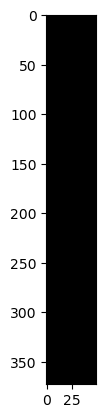

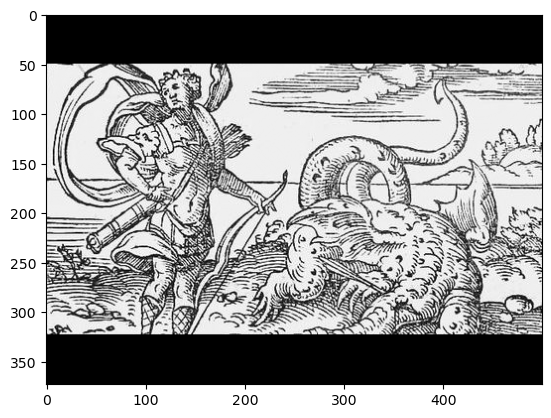

In [19]:
plt.imshow(left50, cmap='gray')
plt.show()
plt.imshow(image_array, cmap='gray')
plt.show()

### Skipping and reversing elements

The general slicing notation ```my_array[start:stop:step]``` contains a third parameter ```step```. This allows us to skip elements. For example, we can extract every second column of the image array (while keeping all rows). What result do you expect?

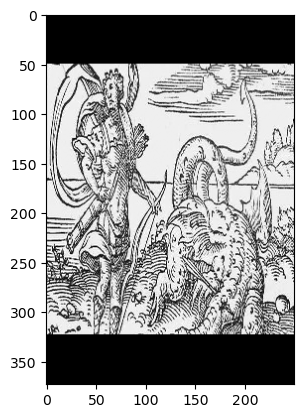

In [20]:
img_skipped = image_array[:, ::2]  # Skip every second column
plt.imshow(img_skipped, cmap='gray')

The step parameter can also be negative, which allows us to reverse the order of the elements. For example, we can reverse the order of the columns in the image:

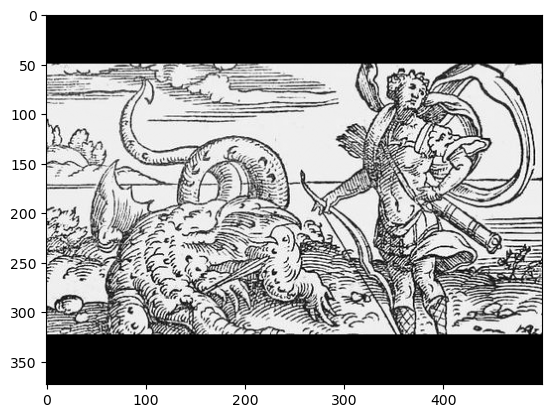

In [21]:
img_reversed = image_array[:, ::-1]  # Reverse the order of the columns
plt.imshow(img_reversed, cmap='gray')

## Boolean indexing (masking)

Instead of using numerical indices to extract values from the array, we can also select them by some criteria. Let's create a new random array:

In [22]:
my_array2 = np.random.normal(size=10)
my_array2

array([-0.07723554,  0.36472085, -1.1379993 , -0.31818756, -0.52185679,
       -2.01321582,  0.3068175 , -0.67503066, -0.12768459,  0.76907424])

How to proceed now if we for example only want to recover the elements that are larger than 0 ?

Let's try to see what happens when we just write it down as we would in regular mathemetics with a single number:

In [23]:
above_zero = my_array2 > 0
above_zero

array([False,  True, False, False, False, False,  True, False, False,
        True])

We see that the **output is again an array**, but instead of being filled with numbers, it contains only ```False``` and ```True```. Those values also exist in plain Python and are called booleans. For example:

In [24]:
a = 3
a > 10

False

What we've created is a so-called **boolean array**. It is an array of the same shape as the original one, but with ```True``` where the condition is met and ```False``` where it is not.

We can now use this **boolean array** ```above_zero``` as a so-called **"mask" to extract values** from any array of the same size. A natural candidate is the original array itself: if we superpose ```above_zero``` to ```my_array2```, we only select those values in ```my_array2``` which are ```True``` in ```above_zero```. We do this by passing the entire boolean array to square brackets (instead of an index ```my_array[i]```):

In [25]:
my_array2[above_zero]

array([0.36472085, 0.3068175 , 0.76907424])

Naturally the output array is typically smaller than the original one as it only contains the values that in fact meet the condition (here "larger than 0").

<img src="https://github.com/guiwitz/ISDAwPython_day2/raw/master/images/logical_indexing.jpeg" alt="masking" width="500">

### Masking in images

Masking is also very useful for images. Let's take the image from above (with the black top part) and create a boolean mask that selects only the pixels that are very dark.

*Note, that this image was imported as a float data type with values between 0.0 and 1.0, so that dark values could be defined to have a value below 0.1.*

Then we use this mask to extract the black pixels from the image and set them to white instead (i.e. to 1.0):

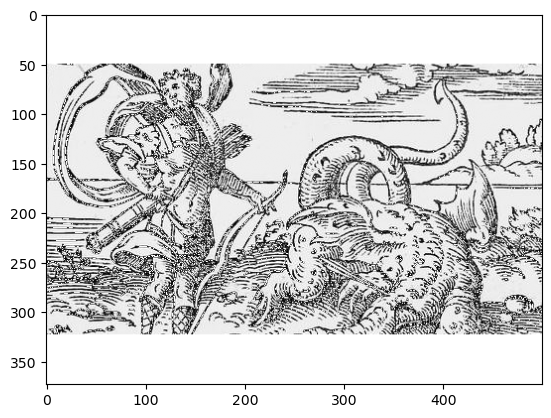

In [26]:
black = image_array < 0.1  # Create a boolean mask for black pixels
image_array[black] = 1  # Set black pixels to white
plt.imshow(image_array, cmap='gray')

We can see now that the top/bottom parts - and some other pixels - have been set to white.

# Exercises

1. Create a one-dimensional numpy array of length 10 with random integers between -10 and 10.

2. Extract the the last three elements of the array using slicing.

3. Create a boolean array telling which values in the array from (1.) are smaller than 0.

4. Recover only those values in a new array via indexing.

In [37]:

### YOUR CODE HERE

a = np.random.uniform(-10, 10, (10,10))
b = a.astype(int)
c = b[-3:,-3:]
c


array([[ 9,  3,  3],
       [ 6,  9,  0],
       [ 7, -4,  4]])

In [43]:
m = b < 0
b[m] = 0
b


array([[9, 4, 0, 0, 3, 8, 0, 0, 7, 0],
       [1, 0, 5, 8, 1, 7, 9, 0, 0, 0],
       [4, 0, 3, 0, 0, 0, 0, 7, 0, 1],
       [2, 7, 0, 0, 2, 4, 0, 7, 3, 7],
       [7, 9, 3, 0, 5, 0, 1, 1, 0, 2],
       [3, 6, 8, 0, 0, 2, 9, 6, 9, 0],
       [5, 5, 6, 3, 5, 8, 0, 0, 7, 0],
       [0, 4, 0, 1, 0, 7, 0, 9, 3, 3],
       [0, 0, 7, 2, 0, 0, 0, 6, 9, 0],
       [0, 6, 8, 7, 8, 1, 3, 7, 0, 4]])

5. Load he following image as a numpy array (using `skimage.io.imread()`), check its shape and display it: https://upload.wikimedia.org/wikipedia/en/0/04/Snake_trs-80.jpg

In [67]:

### YOUR CODE HERE

path = "https://upload.wikimedia.org/wikipedia/en/0/04/Snake_trs-80.jpg"

i = skimage.io.imread(path)
np.median(i)
np.mean(i)


np.float64(55.00902864259029)

In [50]:
from matplotlib import pyplot as plt

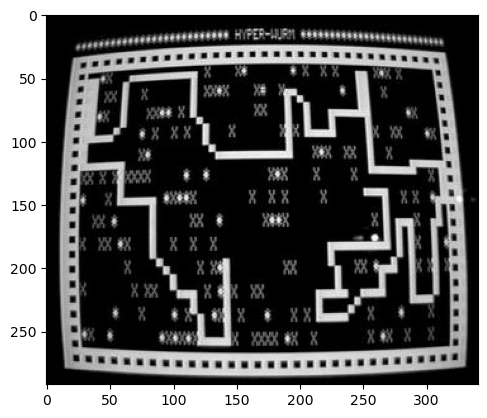

In [52]:
plt.imshow(i, cmap="gray")

6. Take the right half of the image and save it in a new variable.

7. Squeeze the extracted slice along the vertical axis by skipping every second row, and reverse it at the same time (also vertically). Show the result.

In [54]:

### YOUR CODE HERE
i.shape

(292, 341)

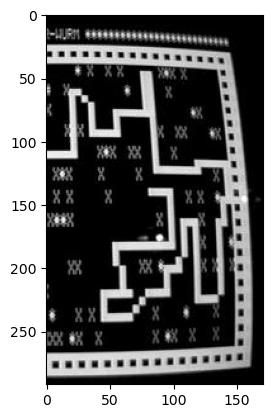

In [57]:
ih = i[:,170:]
plt.imshow(ih, cmap="gray")

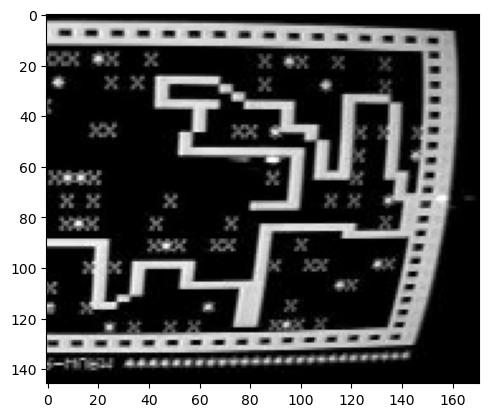

In [79]:
ip = ih[::-2,::]
plt.imshow(ip, cmap="gray")

8. Find out the image's data type and the range of pixel values. 

9. Set all pixels with a value larger than a certain threshold to white. Find out yourself what this threshold should be and what "white" means in this context.

In [77]:

### YOUR CODE HERE

b = i > 10
i[b] = 255




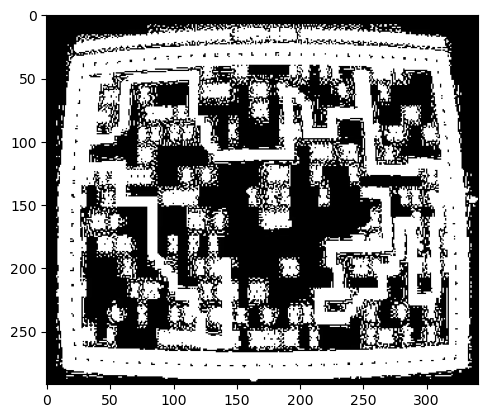

In [78]:
plt.imshow(i, cmap="gray")